In [824]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium

%matplotlib notebook

plt.style.use('default')
mpl.rcParams['figure.figsize'] = (8, 8)

In [825]:
#Open the csv files with the terrains data

terrains2001 = pd.read_csv('precio-de-terrenos-2001.csv', sep=';', thousands=',')
terrains2002 = pd.read_csv('precio-de-terrenos-2002.csv', sep=';', thousands=',')
terrains2003 = pd.read_csv('precio-de-terrenos-2003.csv', sep=';', thousands=',')
terrains2004 = pd.read_csv('precio-de-terrenos-2004.csv', sep=';', thousands=',')
terrains2005 = pd.read_csv('precio-de-terrenos-2005.csv', sep=';', thousands=',')
terrains2006 = pd.read_csv('precio-de-terrenos-2006.csv', sep=';', thousands=',')
terrains2007 = pd.read_csv('precio-de-terrenos-2007.csv', sep=';', thousands=',')
terrains2008 = pd.read_csv('precio-de-terrenos-2008.csv', sep=';', thousands=',')
terrains2009 = pd.read_csv('precio-de-terrenos-2009.csv', sep=';', thousands=',')
terrains2010 = pd.read_csv('precio-de-terrenos-2010.csv', sep=';', thousands=',')
terrains2011 = pd.read_csv('precio-de-terrenos-2011.csv', sep=';', thousands=',')
terrains2012 = pd.read_csv('precio-de-terrenos-2012.csv', sep=';', thousands=',')
terrains2013 = pd.read_csv('precio-de-terrenos-2013.csv', sep=';', thousands=',')
#terrains2014 = pd.read_csv('precio-de-terrenos-2014.csv', sep=';')
terrains2015 = pd.read_csv('precio-de-terrenos-2015.csv', sep=';')
terrains2016 = pd.read_csv('precio-de-terrenos-2016.csv', decimal=',', sep=';')
terrains2017 = pd.read_csv('precio-de-terrenos-2017.csv', decimal=',', sep=';')

In [826]:
#Clean the data, removing the unwanted terrains from other locations and unneeded columns.

terrains2001 = (terrains2001.where(terrains2001['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2001['Date'] = pd.to_datetime(terrains2001['Date'], format='%Y/%m/%d')


terrains2002 = (terrains2002.where(terrains2002['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2002['Date'] = pd.to_datetime(terrains2002['Date'], format='%Y/%m/%d')


terrains2003 = (terrains2003.where(terrains2003['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2003['Date'] = pd.to_datetime(terrains2003['Date'], format='%Y/%m/%d')


terrains2004 = (terrains2004.where(terrains2004['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2004['Date'] = pd.to_datetime(terrains2004['Date'], format='%Y/%m/%d')


terrains2005 = (terrains2005.where(terrains2005['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2005['Date'] = pd.to_datetime(terrains2005['Date'], format='%Y/%m/%d')


terrains2006 = (terrains2006.where(terrains2006['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2006['Date'] = pd.to_datetime(terrains2006['Date'], format='%Y/%m/%d')


terrains2007 = (terrains2007.where(terrains2007['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2007['Date'] = pd.to_datetime(terrains2007['Date'], format='%Y/%m/%d')


terrains2008 = (terrains2008.where(terrains2008['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2008['Date'] = pd.to_datetime(terrains2008['Date'], format='%Y/%m/%d')


terrains2009 = (terrains2009.where(terrains2009['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2009['Date'] = pd.to_datetime(terrains2009['Date'], format='%Y/%m/%d')


terrains2010 = (terrains2010.where(terrains2010['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2010['Date'] = pd.to_datetime(terrains2010['Date'], format='%Y/%m/%d')


terrains2011 = (terrains2011.where(terrains2011['barrio'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'barrio': 'Location', 'fecha': 'Date', 'dolares': 'Value in US Dollars',
                                                   'u_s_m2': 'Value of m2 (US Dollars)'})
                                   .set_index('Location')
                                   .drop(['longitud', 'latitud', 'calle', 'numero', 'fot','distrito_c',
                                          'fuente_','comuna', 'cotiz', 'pesos', 'm2__pesos_'], axis=1))
terrains2011['Date'] = pd.to_datetime(terrains2011['Date'], format='%Y/%m/%d')


terrains2012 = (terrains2012.where(terrains2012['BARRIOS'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'BARRIOS': 'Location', 'FECHA': 'Date', 'DOLARES': 'Value in US Dollars',
                                                   'U_S_M2': 'Value of m2 (US Dollars)', 
                                                   'M2': 'm2'})
                                   .set_index('Location')
                                   .drop(['LAT', 'LON', 'CALLE', 'NUMERO', 'COMUNA','Z_M2', 'PESOS'], axis=1))
terrains2012['Value in US Dollars'] = terrains2012['Value of m2 (US Dollars)'] * terrains2012['m2']
terrains2012['Date'] = pd.to_datetime(terrains2012['Date'], format='%Y/%m/%d')


terrains2013 = (terrains2013.where(terrains2013['BARRIOS'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'BARRIOS': 'Location', 'FECHA': 'Date', 'DOLARES': 'Value in US Dollars',
                                                   'U_S_M2': 'Value of m2 (US Dollars)', 
                                                   'M2': 'm2'})
                                   .set_index('Location')
                                   .drop(['LATITUD', 'LONGITUD', 'CALLE', 'NUMERO', 'COMUNA','Z_M2', 'Z'], axis=1))
terrains2013['Date'] = pd.to_datetime(terrains2013['Date'], format='%Y/%m/%d')


#After cleaning and revising the data, the 2014 dataset is empty and there were no terrains for VILLA DEL PARQUE this year.

terrains2015 = (terrains2015.where(terrains2015['BARRIO'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'BARRIO': 'Location', 'DOLARES': 'Value in US Dollars',
                                                   'U_S_M2': 'Value of m2 (US Dollars)', 'M2': 'm2'})
                                   .set_index('Location')
                                   .drop(['X', 'Y', 'CALLE', 'NUMERO', 'FOT', 'COMUNA', 'DIRECCION NORMALIZADA',
                                          'CODIGO_POSTAL', 'CODIGO_POSTAL_ARGENTINO', 'COTIZ'], axis=1))
terrains2015['Date'] = pd.to_datetime('2015/06/01', format='%Y/%m/%d')
terrains2015['Value of m2 (US Dollars)'] = terrains2015['Value of m2 (US Dollars)'].astype(float)


terrains2016 = (terrains2016.where(terrains2016['BARRIOS'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'BARRIOS': 'Location', 'FECHA': 'Date', 'DOLARES': 'Value in US Dollars',
                                                   'U_S_M2': 'Value of m2 (US Dollars)', 'M2': 'm2'})
                                   .set_index('Location')
                                   .drop(['X', 'Y', 'CALLE', 'NUMERO', 'FOT','DIRECCION_NORMALIZADA', 'COMUNA', 
                                          'CODIGO_POSTAL', 'CODIGO_POSTAL_ARGENTINO', 'COTIZ'], axis=1))
terrains2016['Date'] = (terrains2016['Date'].apply(lambda x: str(x.replace(' ', '12/29/2016'))))
terrains2016['Date'] = pd.to_datetime(terrains2016['Date'])
terrains2016['Value of m2 (US Dollars)'] = terrains2016['Value of m2 (US Dollars)'].astype(float)


terrains2017 = (terrains2017.where(terrains2017['BARRIOS'] == 'VILLA DEL PARQUE')
                                   .dropna()
                                   .rename(columns={'BARRIOS': 'Location', 'FECHA': 'Date', 'DOLARES': 'Value in US Dollars',
                                                   'U_S_M2': 'Value of m2 (US Dollars)', 'M2': 'm2'})
                                   .set_index('Location')
                                   .drop(['X', 'Y', 'CALLE', 'NUMERO', 'FOT','DIRECCION_NORMALIZADA', 'COMUNA', 
                                          'CODIGO_POSTAL', 'CODIGO_POSTAL_ARGENTINO', 'COTIZ'], axis=1))
terrains2017['Date'] = pd.to_datetime(terrains2017['Date'])
terrains2017['Value of m2 (US Dollars)'] = terrains2017['Value of m2 (US Dollars)'].astype(float)


In [827]:
mean01 = terrains2001['Value of m2 (US Dollars)'].mean()
mean02 = terrains2002['Value of m2 (US Dollars)'].mean()
mean03 = terrains2003['Value of m2 (US Dollars)'].mean()
mean04 = terrains2004['Value of m2 (US Dollars)'].mean()
mean05 = terrains2005['Value of m2 (US Dollars)'].mean()
mean06 = terrains2006['Value of m2 (US Dollars)'].mean()
mean07 = terrains2007['Value of m2 (US Dollars)'].mean()
mean08 = terrains2008['Value of m2 (US Dollars)'].mean()
mean09 = terrains2009['Value of m2 (US Dollars)'].mean()
mean10 = terrains2010['Value of m2 (US Dollars)'].mean()
mean11 = terrains2011['Value of m2 (US Dollars)'].mean()
mean12 = terrains2012['Value of m2 (US Dollars)'].mean()
mean13 = terrains2013['Value of m2 (US Dollars)'].mean()
mean15 = terrains2015['Value of m2 (US Dollars)'].mean()
mean14 = (mean13+mean15)/2
mean16 = terrains2016['Value of m2 (US Dollars)'].mean()
mean17 = terrains2017['Value of m2 (US Dollars)'].mean()

max01 = terrains2001['Value of m2 (US Dollars)'].max()
max02 = terrains2002['Value of m2 (US Dollars)'].max()
max03 = terrains2003['Value of m2 (US Dollars)'].max()
max04 = terrains2004['Value of m2 (US Dollars)'].max()
max05 = terrains2005['Value of m2 (US Dollars)'].max()
max06 = terrains2006['Value of m2 (US Dollars)'].max()
max07 = terrains2007['Value of m2 (US Dollars)'].max()
max08 = terrains2008['Value of m2 (US Dollars)'].max()
max09 = terrains2009['Value of m2 (US Dollars)'].max()
max10 = terrains2010['Value of m2 (US Dollars)'].max()
max11 = terrains2011['Value of m2 (US Dollars)'].max()
max12 = terrains2012['Value of m2 (US Dollars)'].max()
max13 = terrains2013['Value of m2 (US Dollars)'].max()
max15 = terrains2015['Value of m2 (US Dollars)'].max()
max14 = (max13+max15)/2
max16 = terrains2016['Value of m2 (US Dollars)'].max()
max17 = terrains2017['Value of m2 (US Dollars)'].max()

min01 = terrains2001['Value of m2 (US Dollars)'].min()
min02 = terrains2002['Value of m2 (US Dollars)'].min()
min03 = terrains2003['Value of m2 (US Dollars)'].min()
min04 = terrains2004['Value of m2 (US Dollars)'].min()
min05 = terrains2005['Value of m2 (US Dollars)'].min()
min06 = terrains2006['Value of m2 (US Dollars)'].min()
min07 = terrains2007['Value of m2 (US Dollars)'].min()
min08 = terrains2008['Value of m2 (US Dollars)'].min()
min09 = terrains2009['Value of m2 (US Dollars)'].min()
min10 = terrains2010['Value of m2 (US Dollars)'].min()
min11 = terrains2011['Value of m2 (US Dollars)'].min()
min12 = terrains2012['Value of m2 (US Dollars)'].min()
min13 = terrains2013['Value of m2 (US Dollars)'].min()
min15 = terrains2015['Value of m2 (US Dollars)'].min()
min14 = (min13+min15)/2
min16 = terrains2016['Value of m2 (US Dollars)'].min()
min17 = terrains2017['Value of m2 (US Dollars)'].min()

means = {'Mean Value of m2 (US Dollars)': [mean01, mean02, mean03, mean04, mean05, mean06, mean07, mean08,
                                          mean09, mean10, mean11, mean12, mean13, mean14, mean15, mean16, mean17]}
maxs = {'Max Value of m2 (US Dollars)': [max01, max02, max03, max04, max05, max06, max07, max08,
                                          max09, max10, max11, max12, max13, max14, max15, max16, max17]}

mins = {'Min Value of m2 (US Dollars)': [min01, min02, min03, min04, min05, min06, min07, min08,
                                          min09, min10, min11, min12, min13, min14, min15, min16, min17]}
date_axis = np.arange(2001, 2018)



yearly_mean = pd.DataFrame(data=means)
yearly_min = pd.DataFrame(data=mins)
yearly_max = pd.DataFrame(data=maxs)


yearly_stats = pd.merge(yearly_mean, yearly_min, how='inner', left_index=True, right_index=True, sort=True)
yearly_stats = pd.merge(yearly_stats, yearly_max, how='inner', left_index=True, right_index=True, sort=True)
yearly_stats['Year'] = date_axis
yearly_stats.set_index('Year', inplace=True)

In [828]:
frames = [terrains2001, terrains2002, terrains2003, terrains2004, terrains2005, terrains2006, terrains2007, terrains2008,
          terrains2009, terrains2010, terrains2011, terrains2012, terrains2013, terrains2015, terrains2016, terrains2017]

df = pd.concat(frames)

c:\users\jason\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [829]:
df.dtypes

Date                        datetime64[ns]
Value in US Dollars                float64
Value of m2 (US Dollars)           float64
m2                                 float64
dtype: object

In [830]:
#Convert the Date column to datetime type

df['Date'] = pd.to_datetime(df['Date'], yearfirst=True)

In [831]:
df.dtypes

Date                        datetime64[ns]
Value in US Dollars                float64
Value of m2 (US Dollars)           float64
m2                                 float64
dtype: object

In [832]:
#Cleaning the contaminated date

df= df.where(df['Date'] > pd.to_datetime('2001-01-01', format='%Y/%m/%d'))
df = df.sort_values('Date')
df = df[:-4]
df.tail()

,Date,Value in US Dollars,Value of m2 (US Dollars),m2
Location,,,,
VILLA DEL PARQUE,2017-07-06,650000.0,1756.8,370.0
VILLA DEL PARQUE,2017-07-06,1150000.0,3352.8,343.0
VILLA DEL PARQUE,2017-08-06,480000.0,3000.0,160.0
VILLA DEL PARQUE,2017-09-06,1200000.0,1597.9,751.0
VILLA DEL PARQUE,2017-12-06,250000.0,1462.0,171.0


In [833]:
yearly_stats

,Mean Value of m2 (US Dollars),Min Value of m2 (US Dollars),Max Value of m2 (US Dollars)
Year,,,
2001,393.397297,173.3,617.80
2002,244.356000,63.1,448.22
2003,235.000000,200.0,270.00
2004,364.105556,173.3,751.90
2005,522.470000,305.6,951.10
2006,618.158824,100.0,1875.00
2007,713.590909,288.7,1866.70
2008,645.000000,586.6,703.40
2009,949.342857,469.0,1704.50


<IPython.core.display.Javascript object>


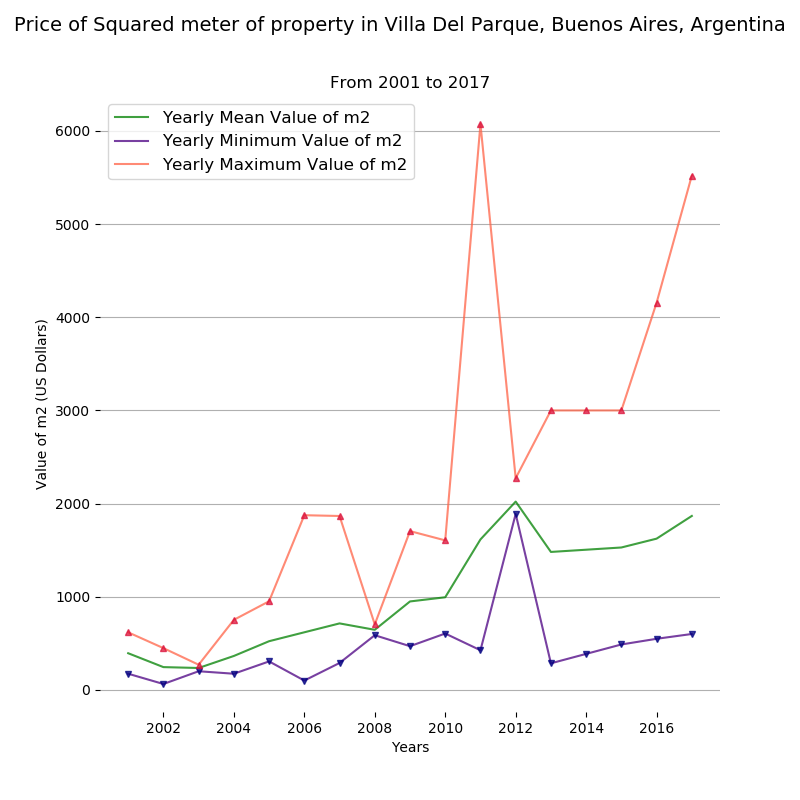

In [834]:
plt.figure()
plt.suptitle("Price of Squared meter of property in Villa Del Parque, Buenos Aires, Argentina", fontsize=14)
plt.title("From 2001 to 2017", fontsize=12)

#Plot the 2001-2017 values
plt.plot(date_axis, yearly_stats['Mean Value of m2 (US Dollars)'], '-', color='green', ms=2, alpha=0.75) 
plt.plot(date_axis, yearly_stats['Min Value of m2 (US Dollars)'], '-', color='indigo', ms=2, alpha=0.75) 
plt.plot(date_axis, yearly_stats['Max Value of m2 (US Dollars)'], '-', color='tomato', ms=2, alpha=0.75) 

plt.plot(date_axis, yearly_stats['Min Value of m2 (US Dollars)'], 'bv', color='navy', ms=5, alpha=0.75) 
plt.plot(date_axis, yearly_stats['Max Value of m2 (US Dollars)'], 'r^', color='crimson', ms=5, alpha=0.75)

plt.legend(['Yearly Mean Value of m2', 'Yearly Minimum Value of m2', 'Yearly Maximum Value of m2'], loc='upper left',
           prop={'size':12})

plt.xlabel('Years')
plt.ylabel('Value of m2 (US Dollars)')

ax = plt.gca()
ax.yaxis.grid()

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.savefig(fname = "plot.png", bbox_inches='tight')
